# 1. Data cleaning

## Twee gegevensreeksen inlezen en samenvoegen

In [23]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#read the datasets 
df = pd.read_csv("steps.csv", sep=";")
df1 = pd.read_csv("survey.csv", sep=',')

#merge the datasets 
Data = pd.merge(df1, df, how='right', on='id')

Data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Data.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


## De gegevens opschonen: onmogelijke waarden verwijderen 

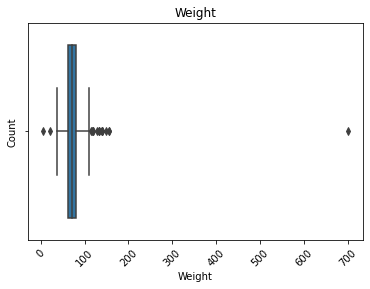

In [4]:
sns.boxplot(x="weight", data=Data)
plt.title("Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [5]:
Data["weight"]=Data["weight"].replace(700,np.nan)

In [6]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Data columns (total 337 columns):
 #    Column       Dtype  
---   ------       -----  
 0    id           int64  
 1    city         object 
 2    gender       object 
 3    age          object 
 4    hh_size      int64  
 5    education    int64  
 6    education_1  object 
 7    height       float64
 8    weight       float64
 9    20-6-2013    float64
 10   21-6-2013    float64
 11   22-6-2013    float64
 12   23-6-2013    float64
 13   24-6-2013    float64
 14   25-6-2013    float64
 15   26-6-2013    float64
 16   27-6-2013    float64
 17   28-6-2013    float64
 18   29-6-2013    float64
 19   30-6-2013    float64
 20   1-7-2013     float64
 21   2-7-2013     float64
 22   3-7-2013     float64
 23   4-7-2013     float64
 24   5-7-2013     float64
 25   6-7-2013     float64
 26   7-7-2013     float64
 27   8-7-2013     float64
 28   9-7-2013     float64
 29   10-7-2013    float64
 30   11-7-2013    float64
 31

## Variabele gemiddelde stappen per deelnemer 

In [7]:
Data["mean"]=Data.iloc[:,9:336].mean(axis=1)
Data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


# 2. Verkennende gegevensanalyse 

## Een analyse van de gemiddelde stappen per deelnemer 

### Histogram van de verdeling

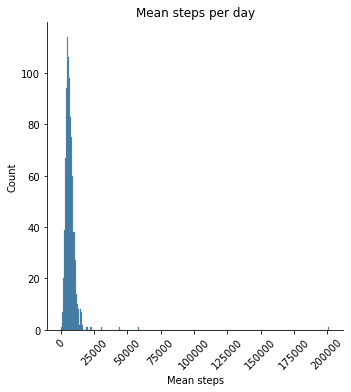

In [16]:
sns.displot(x="mean", kde=False, data=Data)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Boxplot van de verdeling 

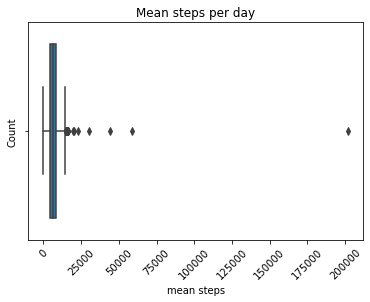

In [14]:
sns.boxplot(x="mean", data=Data)
plt.title("Mean steps per day")
plt.xlabel("mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Samenvattende statistieken (maat voor centrale tendens en variatie, bv. gemiddelde, mediaan, variantie)

In [15]:
print('Median = '+str(Data["mean"].median()))
print('Mean = '+str(Data["mean"].mean()))
print('St Dev. = '+str(Data["mean"].std()))

Median = 6245.006060606061
Mean = 7036.627484984338
St Dev. = 7396.87900787018


### Mondelinge beschrijving van de verdeling, inclusief commentaar op normaliteit, scheefheid, uitschieters, enz 

Uit zowel de histogram als boxplot is op te merken dat er een uitschieten is van gemiddeld aantal stappen 200.000 stappen. Dit gemiddelde lijkt niet helemaal te kloppen. Hieronder zal de uitschieter eruit gehaald worden en opnieuw de statistieken worden berekend. 

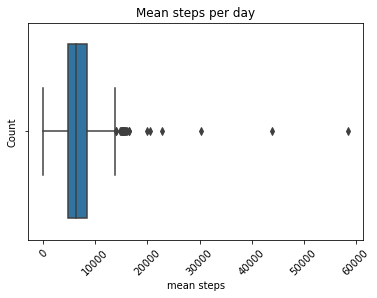

Median = 6244.931601731601
Mean = 6825.928380530858
St Dev. = 3696.491961554726


In [20]:
Data=Data[Data["mean"]<75000]
sns.boxplot(x="mean", data=Data)
plt.title("Mean steps per day")
plt.xlabel("mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

print('Median = '+str(Data["mean"].median()))
print('Mean = '+str(Data["mean"].mean()))
print('St Dev. = '+str(Data["mean"].std()))

## De relatie van gemiddelde stappen per deelnemer met twee categorische variabelen (bv. geslacht, leeftijd, opleiding) 

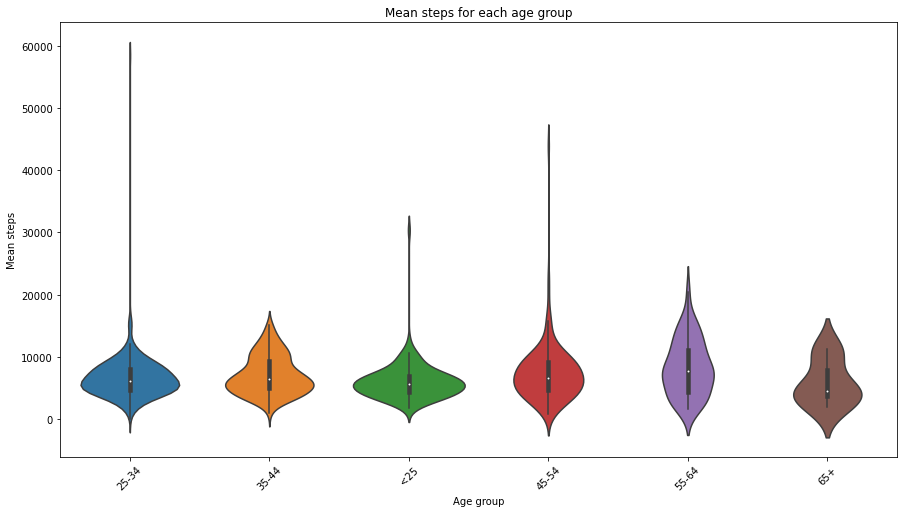

In [22]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.violinplot(x="age",y="mean",data=Data)
plt.title('Mean steps for each age group')
plt.xlabel('Age group')
plt.ylabel('Mean steps')
plt.show()

Uit bovenstaande grafiek is te halen dat mensen onder de 25 jaar minder lopen dan oudere mensen tussen de 55-64 jaar